# HR Analytics Project
 Understanding the Attrition in HR
Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [54]:
pip install -U pip


  Attempting uninstall: pip
    Found existing installation: pip 21.0.1
    Uninstalling pip-21.0.1:
      Successfully uninstalled pip-21.0.1
Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install streamlit


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13451 sha256=d5530cd8e11036d8e34085e6ab97bf0e19bdbee7c47b20f31b5bf5d65459721e
  Stored in directory: c:\users\pravat\appdata\local\pip\cache\wheels\b7\a5\68\fe632054a5eadd531c7a49d740c50eb6adfbeca822b4eab8d4
Successfully built blinker
Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from statsmodels.formula.api import logit, probit, poisson, ols
from sklearn import datasets


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
import warnings
warnings.simplefilter("ignore")


In [3]:
path='C:/Users/pravat/Desktop/PURNIMA/DATA SCIENCE/DATA TRAINED PROJECT/WA_Fn-UseC_-HR-Employee-Attrition.csv'


**DATA ANALYSIS**

In [4]:
data = pd.read_csv(path)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [6]:
data.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
data.shape

(1470, 35)

In [8]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**show null count for each column**

In [10]:
data.isnull().sum()  


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**Plots of Age, Working Years, Years at Present Organization and Years in Current Role**



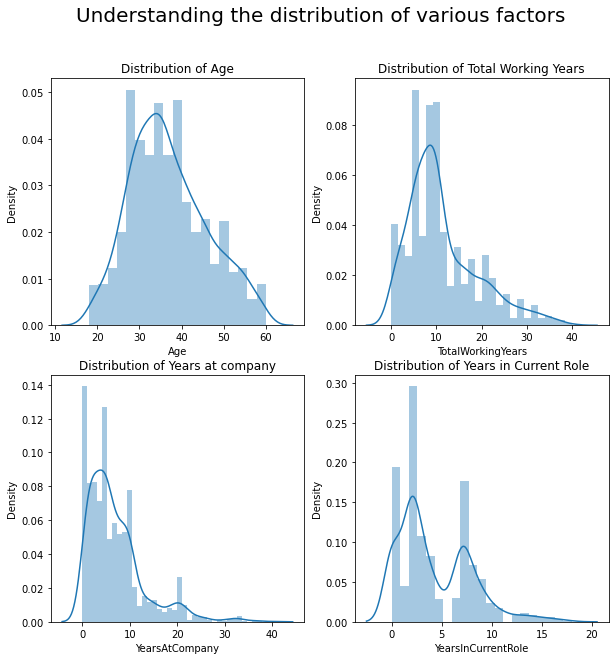

In [11]:
# Reference for adding title for each sub plots: https://gist.github.com/dyerrington/dac39db54161dafc9359995924413a12
fig,ax = plt.subplots(2,2, figsize=(10,10))               # 'ax' has references to all the four axes
plt.suptitle("Understanding the distribution of various factors", fontsize=20)
sns.distplot(data['Age'], ax = ax[0,0])  # Plot on 1st axes
ax[0][0].set_title('Distribution of Age')
sns.distplot(data['TotalWorkingYears'], ax = ax[0,1])  # Plot on IInd axes
ax[0][1].set_title('Distribution of Total Working Years')
sns.distplot(data['YearsAtCompany'], ax = ax[1,0])  # Plot on IIIrd axes
ax[1][0].set_title('Distribution of Years at company')
sns.distplot(data['YearsInCurrentRole'], ax = ax[1,1])  # Plot on IV the axes
ax[1][1].set_title('Distribution of Years in Current Role')
plt.show()                                                # Show all of them now


From the plots, we find that majority of the employees are in the age group of 35-40 years and have a total experience of around 8-10 years.
They have typically spent around 2-4 years at the current organization and have spent 2-3 years in the current role.



# Count Plot



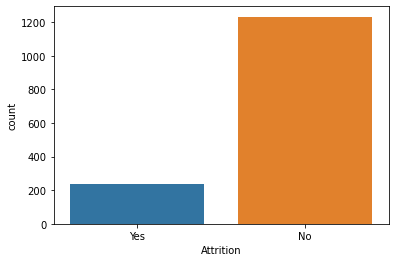

In [12]:
sns.countplot(data['Attrition'])
plt.show()


Above plot shows that around 250 people have left the organization while the organization able to retain around 1200 people.



# Bar Plot



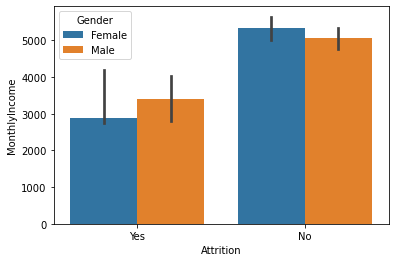

In [13]:
#Bar plot of MOnthly income from the rate of attrition according to gender
#Estimator used is median
from numpy import median
sns.barplot(x='Attrition', y='MonthlyIncome', hue= 'Gender',data=data, estimator=median)# hue= Categorical variable , estimator- Statistical function to estimate within each categorical bin.
plt.show()


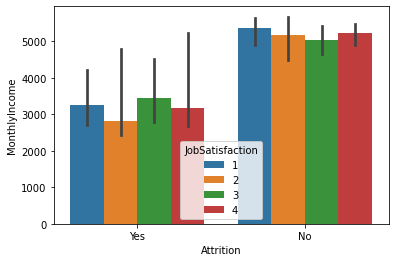

In [14]:
#Bar plot of Job Satisfaction with respect to Monthly income from home according to gender
#Estimator used is median
from numpy import median
sns.barplot(x='Attrition', y='MonthlyIncome', hue= 'JobSatisfaction',data=data, estimator=median)# hue= Categorical variable , estimator- Statistical function to estimate within each categorical bin.
plt.show()


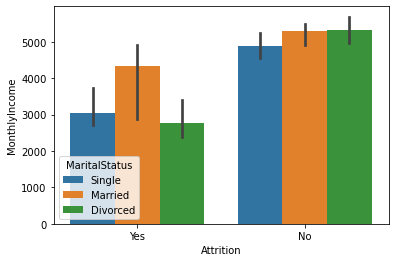

In [15]:
#Bar plot of Job Satisfaction with respect to Monthly income from home according to gender
#Estimator used is median
from numpy import median
sns.barplot(x='Attrition', y='MonthlyIncome', hue= 'MaritalStatus',data=data, estimator=median)# hue= Categorical variable , estimator- Statistical function to estimate within each categorical bin.
plt.show()


We can conclude that people with less monthlyincome (around 3000 units) are likely to leave the organization than those with better income (around 5000 units).



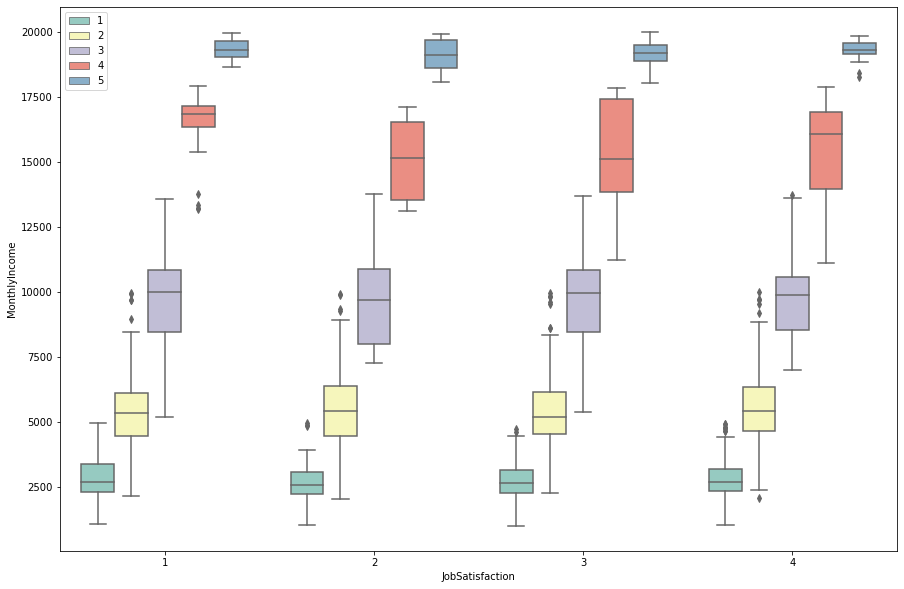

In [16]:
f,ax = plt.subplots(figsize=(15,10))
sns.boxplot(x='JobSatisfaction', y='MonthlyIncome', data=data, hue='JobLevel',palette='Set3')
plt.legend(loc='best')
plt.show()


We can clearly observe the difference in monthly income across different job levels. The difference in the monthly income is observed by the median value for different job satisfaction level.



# Violin Plot



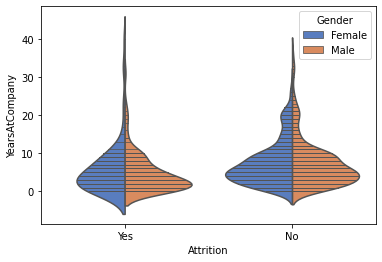

In [17]:
sns.violinplot(x="Attrition", y="YearsAtCompany", hue="Gender", data=data, palette="muted", split=True,
               inner="stick")# When using hue nesting with a variable that takes two levels,
                                 # setting split to True will draw half of a violin for each level. 
                                #This can make it easier to directly compare the distributions.
plt.show()


Violin plots are similar to box plots but they have the capability to explain the data better. The distribution of data is measured by the width of the violin plot. Here, we have plotted the number of years spent in an organization based on gender. The middle dashed line shows the median. The lines above and below the median show the interquartile range. The denser part shows the maximum population falls under that range and thinner part shows the lesser population.

# Joint Plot (Scatter Plot)



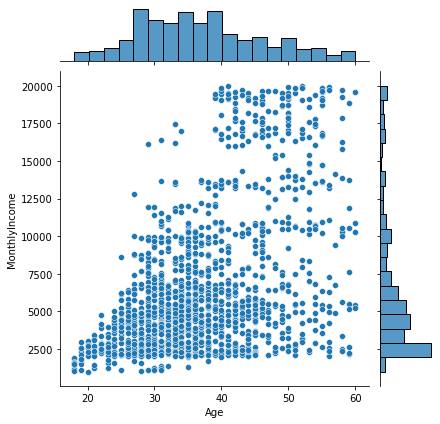

In [18]:
## Joint scatter plot
sns.jointplot(data.Age,data.MonthlyIncome, kind = "scatter")   
plt.show()


Scatter plot shows the relationship between Age and Monthly Income. We can find a linear relationship. Further, the density plot above shows the distribution of age while density plot in the right shows the distribution of the monthly income.



# Factor Plot and Facet Grid



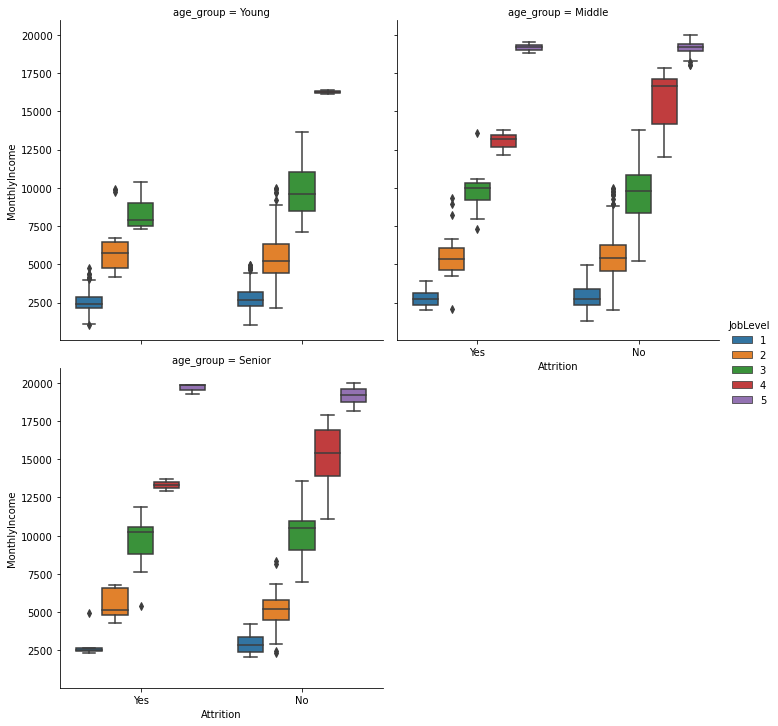

In [20]:
data['age_group'] = pd.cut(data['Age'], 3, labels=['Young', 'Middle', 'Senior']) #Slicing the continuous data into various groups 
                                                                             #Age Group is the name of new column
sns.factorplot(x =   'Attrition',     # Categorical
               y =   'MonthlyIncome',      # Continuous
               hue = 'JobLevel',    # Categorical
               col = 'age_group',
               col_wrap=2,           # Wrap facet after two axes
               kind = 'box',
               data = data)
plt.show()


Above factor plot shows that monthly income plays an important role in retaining the employees in an organization. It can be observed across job levels and different age groups.



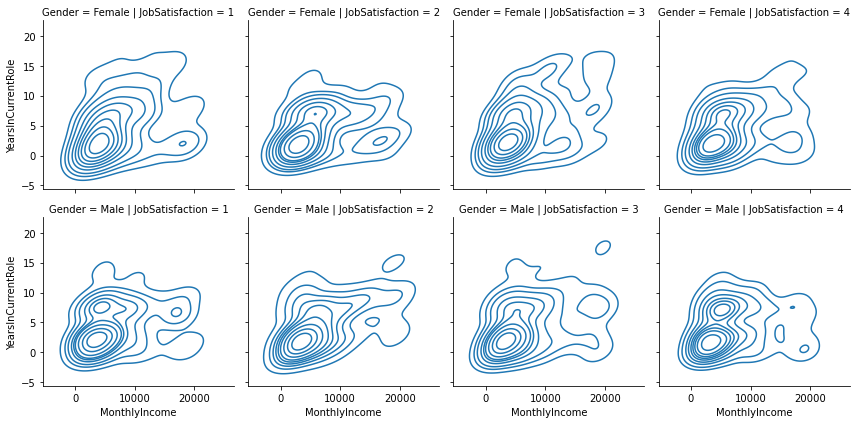

In [22]:
g = sns.FacetGrid(data, col="JobSatisfaction", row="Gender")
g.map(sns.kdeplot, "MonthlyIncome", "YearsInCurrentRole")
plt.show()


We have created kernel density estimation plot. It displays the density distribution of two continuous variables (namely, Monthly income and years in current role). We have created facets according to different job satisfaction levels and gender.



# Pair Plot



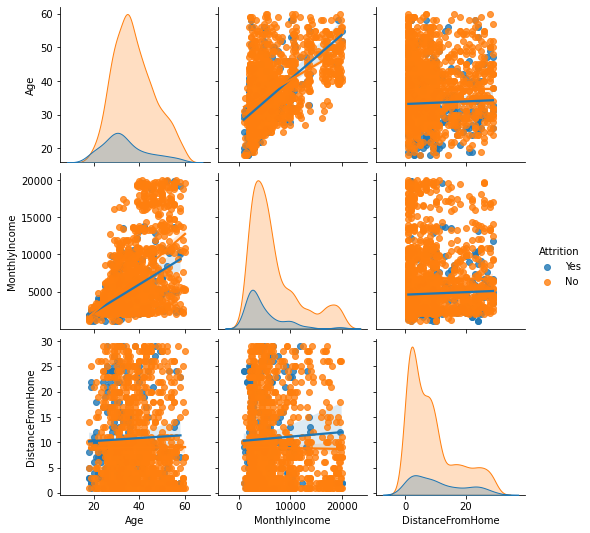

In [24]:
data1 = ['Attrition','Age','MonthlyIncome','DistanceFromHome']
sns.pairplot(data[data1], kind="reg", diag_kind = "kde" , hue = 'Attrition' )
plt.show()


Pairwise plots between continuous variables show the relationship between them. For example. observing the relationship between Age and Monthly Income, we can find that with age, monthly income has increased but the increase is not similar for both groups (Attrition and Retention).



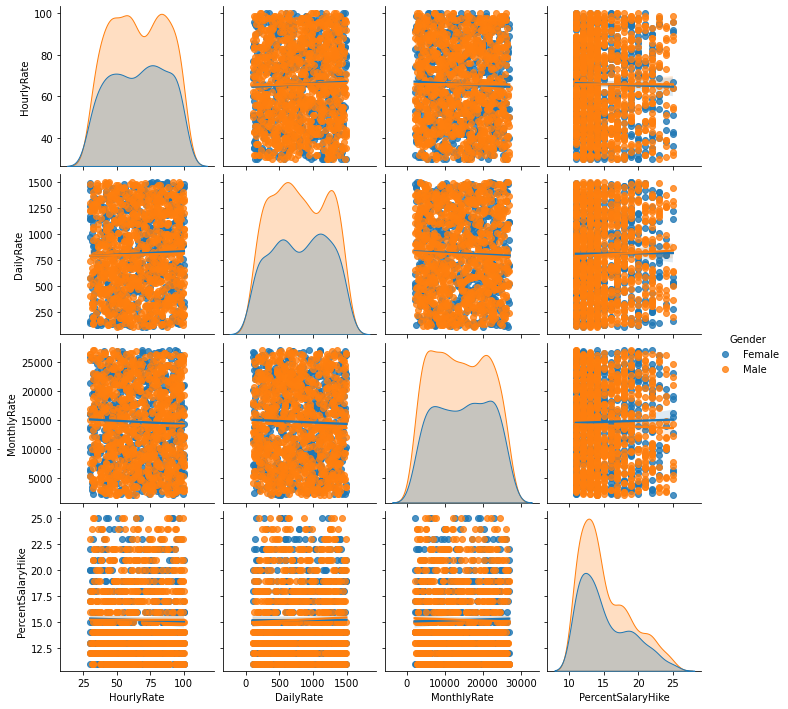

In [26]:
data2 = ['Gender', 'HourlyRate','DailyRate','MonthlyRate','PercentSalaryHike']
sns.pairplot(data[data2], kind="reg", diag_kind = "kde" , hue = 'Gender' )
plt.show()


The above plot does not convey much of any relationship between variables across gender. This shows that hourly rate, daily rate, monthly rate and percent salary hike is same for both female and male employees.



# Correlation (Heat) map



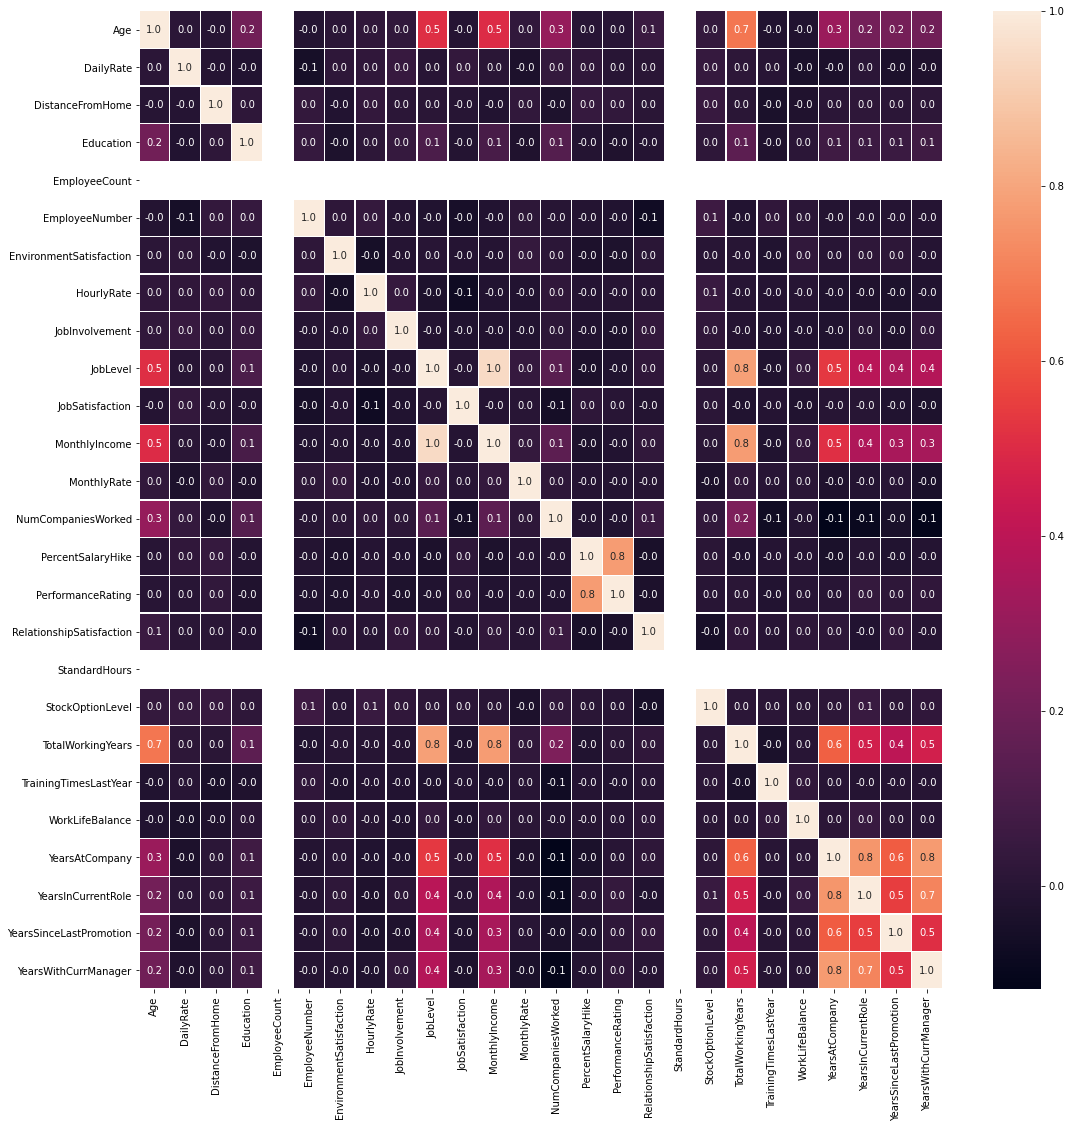

In [29]:
#Plot a correlation map for all numeric variables
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.4, fmt= '.1f',ax=ax)
plt.show()


Two variables are said to be highly correlation when they have a value of 0.7 or greater. The correlation plot between all continuous variables indicate that years at company and year with current manager, years in current role and years with current manager, monthly income and total working years, age and total working years, percent salary hike and performance rating are highly correlated.



# Model building


In [82]:
#Copy categorical data
hr_data = data[['Attrition', 'BusinessTravel','Department',
                       'EducationField','Gender','JobRole',
                       'MaritalStatus',
                       'Over18', 'OverTime']].copy()
hr_data.head()


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


Let’s first replace Yes and No in Attrition with 1 and 0.


In [83]:
Num_val = {'Yes':1, 'No':0}
hr_data['Attrition'] = hr_data["Attrition"].apply(lambda x: Num_val[x])
hr_data.head()


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,1,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,0,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,1,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,0,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,0,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


Now replace other categorical variables with dummy values.


In [84]:
hr_data = pd.get_dummies(hr_data)
hr_data.head()


,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,1,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,1,1,0,1
1,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,1,0
2,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,1
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


Now that we have all the data in numerical format, we can now combine data and hr_data.


In [86]:
hr_data_final = pd.concat([hr_data, data], axis=1)
hr_data_final.head()


,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_group
0,1,0,0,1,0,0,1,0,1,0,...,80,0,8,0,1,6,4,0,5,Middle
1,0,0,1,0,0,1,0,0,1,0,...,80,1,10,3,3,10,7,1,7,Senior
2,1,0,0,1,0,1,0,0,0,0,...,80,0,7,3,3,0,0,0,0,Middle
3,0,0,1,0,0,1,0,0,1,0,...,80,0,8,3,3,8,7,3,0,Middle
4,0,0,0,1,0,1,0,0,0,0,...,80,1,6,3,3,2,2,2,2,Young


In [87]:
data = pd.get_dummies(data)
data.head()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes,age_group_Young,age_group_Middle,age_group_Senior
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,1,1,0,1,0,1,0
1,49,279,8,1,1,2,3,61,2,2,...,0,0,1,0,1,1,0,0,0,1
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,1,1,0,1,0,1,0
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,1,0,1,0,1,0,1,0
4,27,591,2,1,1,7,1,40,3,1,...,0,0,1,0,1,1,0,1,0,0


In [89]:
hr_data_final = pd.concat([data, hr_data], axis=1)
hr_data_final.head()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
target = hr_data_final['Attrition']
features = hr_data_final.drop('Attrition', axis = 1)
#create the train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=10)
#Create the model and train
model = RandomForestClassifier()
model.fit(X_train,y_train)
#predict the results for test
test_pred = model.predict(X_test)
#test the accuracy
accuracy_score(y_test, test_pred)


1.0

The model gave accuracy score of 1.0. The random forest works quite well even with the default parameters. That’s one of reason we used RF for this problem.Though this can be improved by tuning hyper parameters of Random Forest classifier. Random forest also doesn’t over fit easily because of its randomness feature.